In [1]:
def f(x):
  return -53*pow(x,4)-62*pow(x,2)-x+99

[-5.31222951e+01  2.14025123e-04 -6.18906779e+01 -9.98455266e-01
  9.89889771e+01]

In [ ]:
def f2(x):
  return 1/(1+np.exp(-x))

In [4]:
def f3(x):
  return 1/(1+pow(x,2))

In [2]:
def F(A,x):
  y=0
  for i in range(len(A)):
    y+=A[i]*pow(x,len(A)-i-1)
  return y

#高—低

1 階
迭代 49999 次
-> [-0.02249684  0.81187589]
error= 1.4091118230694495


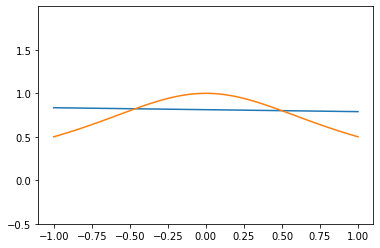

2 階
迭代 32974 次
-> [-0.52624044  0.00674628  0.96059283]
error= 0.04431361946972013


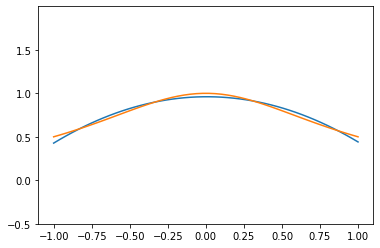

3 階
迭代 2732 次
-> [-0.03575271 -0.50678268  0.02344854  0.95651441]
error= 0.04594494767382131


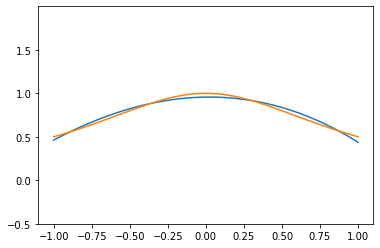

4 階
迭代 2266 次
-> [ 0.20670661 -0.00284123 -0.6980218   0.00204229  0.97947574]
error= 0.00907459491042714


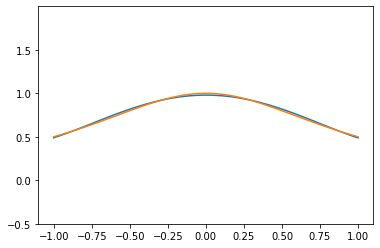

5 階
迭代 2008 次
-> [-0.04347169  0.2048714   0.04985003 -0.69844583 -0.0105591   0.97784349]
error= 0.008998431359151545


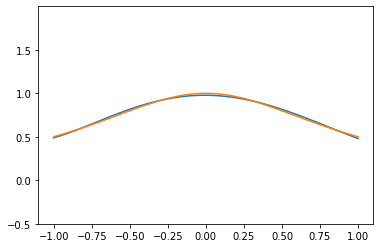

In [5]:
import numpy as np
import random
X=np.linspace(-1,1)
Y=f3(X)

#X=[0,1,2,3,4]
#Y=[5,2,0,2,5]

h=1e-4

def partialW(A,x,y,n): #偏微第n個x的係數
  A1=A.copy()
  A2=A.copy()
  A1[n]+=h
  return (pow(y-F(A1,x),2)-pow(y-F(A2,x),2))/h



batch_size=5

lr=0.1
def train():
  for j in range(len(A)):
    p=0
    arr=np.zeros(len(X))
    for i in range(batch_size):
      index=random.randint(0,len(X)-1)
      while arr[index]==1:
        index=random.randint(0,len(X)-1)
      arr[index]=1
      x=X[index]
      y=Y[index]
      p+=partialW(A,x,y,j)
    A[j]=A[j]-lr*p/batch_size

import matplotlib.pyplot as plt

for n in range(2,7):
  lerr=9999999
  A=np.zeros(n)
  for i in range(50000):
    train()
    error=0
    for j in range(len(X)):
      x=X[j]
      y=Y[j]
      error+=pow(y-F(A,x),2)
    if abs(lerr-error)<1e-7:
      break
    lerr=error
  
  Y2=np.zeros(len(X))
  for k in range(len(X)):
    x=X[k]
    Y2[k]=F(A,x)
  plt.plot(X,Y2)
  print(n-1,'階')
  print('迭代',i,'次')
  print('->',A)
  print('error=',error)
  plt.plot(X,Y)
  plt.ylim(min(Y)-1,max(Y)+1)
  plt.show()